** See answer to question 1 on line 10 output     
 See answer to question 3 from line 7 to line 54       
 See answer to question 10 at the end. **      

In [1]:
import json
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import Imputer
plt.style.use('ggplot')

In [2]:
with open('logins.json', 'r') as k:        
    logins = json.load(k)

In [3]:
logins['date_time'] = [dt.datetime.strptime(k, '%Y-%m-%d %H:%M:%S') for k in logins['login_time']]

In [4]:
df = pd.DataFrame({'date_time' : logins['date_time']})

In [5]:
df.index = df['date_time']

In [6]:
df = df.groupby(pd.TimeGrouper(freq='15Min')).count()

In [7]:
df.columns = ['count']

In [8]:
dic = {}
dic['date'] = [k.date() for k in df.index]
dic['time'] = [k.time() for k in df.index]
dic['count'] = df['count'].values

In [9]:
df15 = pd.DataFrame(dic)

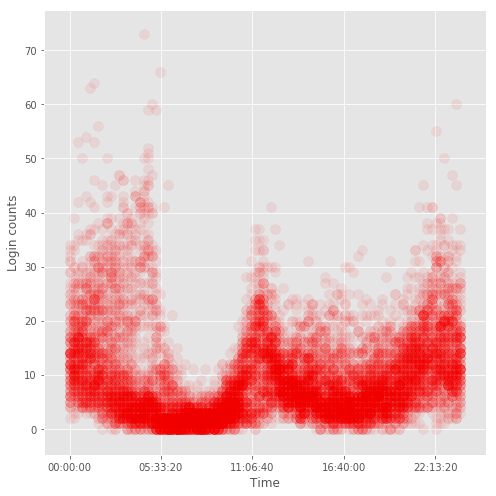

In [10]:
fig, ax = plt.subplots(1,1,figsize = (7, 7))
for k in np.unique(df15.date):
    ax.scatter(x = df15.loc[df15.date == k, 'time'].values,
               y =  df15.loc[df15.date == k, 'count'].values,
               alpha = 0.07,
               color = 'red',
               s = 100)

plt.xlabel('Time')
plt.ylabel('Login counts')
plt.tight_layout();
plt.show()

**The plot above summarizes the daily cycle of login counts. The plot shows that logins are high from midnight to about 5 am, after which logings decrease. There is an increase at around noon followed again by a decrease. The logins again increase around midnight and the cycle continues.**

In [11]:
df15.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9788 entries, 0 to 9787
Data columns (total 3 columns):
count    9788 non-null int64
date     9788 non-null object
time     9788 non-null object
dtypes: int64(1), object(2)
memory usage: 229.5+ KB


In [12]:
df15.describe()

,count
count,9788.000000
mean,9.515938
std,8.328818
min,0.000000
25%,3.000000
50%,7.000000
75%,13.000000
max,73.000000


In [13]:
df15.isnull().sum()

count    0
date     0
time     0
dtype: int64

In [14]:
with open('ultimate_data_challenge.json', 'r') as k:
    logins = json.load(k)

In [15]:
df = pd.DataFrame(logins)

In [16]:
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [17]:
df.isnull().sum()

avg_dist                     0
avg_rating_by_driver       201
avg_rating_of_driver      8122
avg_surge                    0
city                         0
last_trip_date               0
phone                      396
signup_date                  0
surge_pct                    0
trips_in_first_30_days       0
ultimate_black_user          0
weekday_pct                  0
dtype: int64

In [18]:
iphone_ratio = np.sum(df.phone == 'iPhone') / (np.sum(df.phone == 'iPhone') + np.sum(df.phone == 'Android'))

In [19]:
android_ratio = np.sum(df.phone == 'Android') / (np.sum(df.phone == 'iPhone') + np.sum(df.phone == 'Android'))

In [20]:
None_inds = df.loc[((df.phone != 'Android') & (df.phone != 'iPhone')), 'phone'].index
for k in None_inds:
    if np.random.random() < iphone_ratio:
        df.loc[k, 'phone'] = 'iPhone'
    else:
        df.loc[k, 'phone'] = 'Android'

In [21]:
imr = Imputer(missing_values = 'NaN', strategy = 'median', axis = 0)
imr.fit(df['avg_rating_by_driver'].values.reshape(-1,1))
imr.fit(df['avg_rating_of_driver'].values.reshape(-1,1))
df['avg_rating_by_driver_new'] = imr.transform(df['avg_rating_by_driver'].values.reshape(-1, 1))
df['avg_rating_of_driver_new'] = imr.transform(df['avg_rating_of_driver'].values.reshape(-1,1))

In [22]:
df.isnull().sum()

avg_dist                       0
avg_rating_by_driver         201
avg_rating_of_driver        8122
avg_surge                      0
city                           0
last_trip_date                 0
phone                          0
signup_date                    0
surge_pct                      0
trips_in_first_30_days         0
ultimate_black_user            0
weekday_pct                    0
avg_rating_by_driver_new       0
avg_rating_of_driver_new       0
dtype: int64

In [23]:
iphone_ratio_new = np.sum(df.phone == 'iPhone') / (np.sum(df.phone == 'iPhone') + np.sum(df.phone == 'Android'))
android_ratio_new = np.sum(df.phone == 'Android') / (np.sum(df.phone == 'iPhone') + np.sum(df.phone == 'Android'))
print('Old iphone ratio = {} , new iphone ratio = {}\nOld android ratio = {} , new android ratio = {}'.
     format(iphone_ratio, iphone_ratio_new, android_ratio, android_ratio_new))

Old iphone ratio = 0.69716151923232 , new iphone ratio = 0.69728
Old android ratio = 0.30283848076768005 , new android ratio = 0.30272


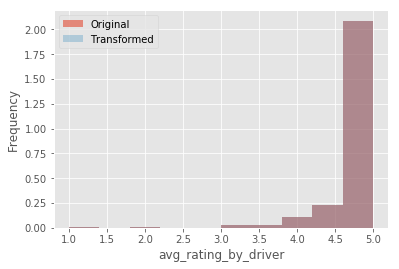

In [24]:
plt.hist(df.loc[df.avg_rating_by_driver.isnull() == False, 'avg_rating_by_driver'],
         normed = True,
         label = 'Original',
         alpha = 0.6)
plt.hist(df['avg_rating_by_driver_new'],
         normed = True,
         label = 'Transformed',
         alpha = 0.3)
plt.xlabel('avg_rating_by_driver')
plt.ylabel('Frequency');
plt.legend()
plt.show()

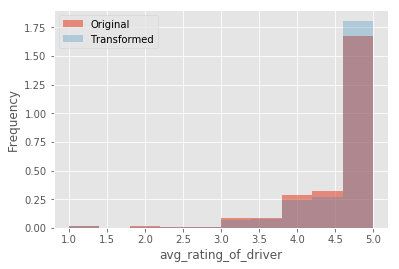

In [25]:
plt.hist(df.loc[df.avg_rating_of_driver.isnull() == False, 'avg_rating_of_driver'],
         normed = True,
         label = 'Original',
         alpha = 0.6)
plt.hist(df['avg_rating_of_driver_new'],
         normed = True,
         label = 'Transformed',
         alpha = 0.3)
plt.xlabel('avg_rating_of_driver')
plt.ylabel('Frequency');
plt.legend()
plt.show()

In [26]:
df.pop('avg_rating_of_driver')
df.pop('avg_rating_by_driver');

In [27]:
df.isnull().sum()

avg_dist                    0
avg_surge                   0
city                        0
last_trip_date              0
phone                       0
signup_date                 0
surge_pct                   0
trips_in_first_30_days      0
ultimate_black_user         0
weekday_pct                 0
avg_rating_by_driver_new    0
avg_rating_of_driver_new    0
dtype: int64

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                    50000 non-null float64
avg_surge                   50000 non-null float64
city                        50000 non-null object
last_trip_date              50000 non-null object
phone                       50000 non-null object
signup_date                 50000 non-null object
surge_pct                   50000 non-null float64
trips_in_first_30_days      50000 non-null int64
ultimate_black_user         50000 non-null bool
weekday_pct                 50000 non-null float64
avg_rating_by_driver_new    50000 non-null float64
avg_rating_of_driver_new    50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [29]:
def sparsifyObj(df, col):

    d = {}

    for k in df[col].unique():
        d[k] = []

    for k in df[col]:
        for j in list(d.keys()):
            if k == j:
                d[j].append(1)
            else:
                d[j].append(0)

    for k in list(d.keys()):
        df[k] = d[k]

    df.pop(col)

In [30]:
sparsifyObj(df, 'city')

In [31]:
sparsifyObj(df, 'phone')

In [32]:
df['SignupDate'] = [dt.datetime.strptime(k, '%Y-%m-%d') for k in df['signup_date']]
df['LastTripDate'] = [dt.datetime.strptime(k, '%Y-%m-%d') for k in df['last_trip_date']]
df.pop('signup_date')
df.pop('last_trip_date');

In [33]:
u_b_c = []

for k in df['ultimate_black_user']:
    if k == True:
        u_b_c.append(1)
    else:
        u_b_c.append(0)

df.pop('ultimate_black_user')
df['ultimte_black_user'] = u_b_c

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
avg_dist                    50000 non-null float64
avg_surge                   50000 non-null float64
surge_pct                   50000 non-null float64
trips_in_first_30_days      50000 non-null int64
weekday_pct                 50000 non-null float64
avg_rating_by_driver_new    50000 non-null float64
avg_rating_of_driver_new    50000 non-null float64
King's Landing              50000 non-null int64
Astapor                     50000 non-null int64
Winterfell                  50000 non-null int64
iPhone                      50000 non-null int64
Android                     50000 non-null int64
SignupDate                  50000 non-null datetime64[ns]
LastTripDate                50000 non-null datetime64[ns]
ultimte_black_user          50000 non-null int64
dtypes: datetime64[ns](2), float64(6), int64(7)
memory usage: 5.7 MB


In [35]:
cutoffDate = max(df.LastTripDate) - dt.timedelta(days = 30)

In [36]:
retained = []
for k in df['LastTripDate']:
    if k >= cutoffDate:
        retained.append(1)
    else:
        retained.append(0)

In [37]:
df['retained'] = retained

In [38]:
fract_retained = sum(retained)/len(retained)

In [39]:
print(fract_retained)

0.37608


In [40]:

def plot_corr(df,size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    cax = ax.matshow(corr,cmap = 'RdBu',vmin = -1, vmax = 1)
    ticks = np.arange(0,)
    plt.xticks(np.arange(0,len(corr.columns),1), corr.columns, rotation = 90);
    plt.yticks(np.arange(0,len(corr.columns),1), corr.columns);
    plt.colorbar(cax)
    plt.tight_layout()

In [41]:
plot_corr(df)

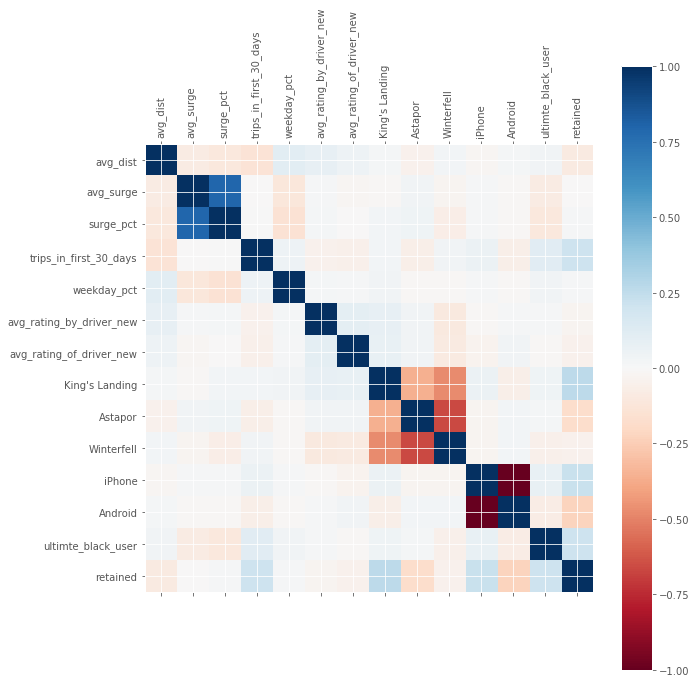

In [42]:
plt.show()

In [43]:
df.set_index('retained',inplace=True,drop=True)

In [44]:
df.pop('SignupDate')
df.pop('LastTripDate')
X = df.values
y = np.array(df.index.astype(int))

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split 
from sklearn.metrics import classification_report
from sklearn.preprocessing import normalize

In [46]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state=42)
X_train = normalize(X_train)
X_test = normalize(X_test)

** Answer to question 3 :**

In [47]:
logreg = LogisticRegression() # logistic regression model

# Chose this model as it is easier to interpret. Also, as there is no correlation between features, 
# there is no need for PCA.  
# The missing values were imputed (see code above) keeping in mind that the underlying distribution does not change.
# Time was converted to datetime object.
# Categorical variables were turned to sparse matrices.

In [48]:
params = {'class_weight': ['balanced'],'C' : np.arange(0.1,1,0.01)} # model parameters

In [49]:
clf = GridSearchCV(logreg,params,cv=5) # optimizing model parameters

In [50]:
clf.fit(X_train,y_train); # fitting the model

In [51]:
print(classification_report(y_test, clf.predict(X_test))) # validating the model. The model shows precision and recall
# of about 0.7

             precision    recall  f1-score   support

          0       0.78      0.70      0.74      7800
          1       0.57      0.68      0.62      4700

avg / total       0.70      0.69      0.69     12500



In [52]:
coefficients = pd.DataFrame({"Feature":df.columns,"Coefficients":np.transpose(clf.best_estimator_.coef_[0])})
coefficients.set_index('Feature',inplace=True,drop=True)
coefficients
# Following are the coefficients for different features:

,Coefficients
Feature,
avg_dist,1.764938
avg_surge,0.514965
surge_pct,2.803611
trips_in_first_30_days,3.911061
weekday_pct,3.979132
avg_rating_by_driver_new,1.677374
avg_rating_of_driver_new,1.067811
King's Landing,12.153276
Astapor,-8.109062


Insights from the coeeficients of the logistic regression model:       
1- Ultimate black users have a large effect on retention rate (0.367).          
2- User's who use Android have a negative coefficient. Check that the app is working properly on android phones.       
3- User's from king's landing have a high retention rate.        

** Answer to question 2 :**          
1- Key measure of success: Fraction of partners which serve both cities. A positive increase in this fraction will suggest that the toll concession has had the required impact.        
            
2- Experiment:            
    Provide concession to 50% of the partners. In this way divide the parterns into 2 groups.         
    Check for measure of success (fraction which serves both the cities) at different time intervals.          
    For example check this weekly.         
    If there is an increase in the fraction which serves both the cities and that increase translates to financial gains that outweigh the concessions given then this will be a profitable endeavour.
    